# Module 1 - DNA sequencing, strings, and matching

In [90]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [1]:
!wget --no-check 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'

--2024-03-19 12:08:46--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.167, 18.155.188.60, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.07s   

2024-03-19 12:08:47 (710 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



### making a genome reader function 

In [14]:
def read_genome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>': #don't want the description
                genome += line.rstrip() #removes whitespace
    return genome

In [18]:
genome = read_genome('lambda_virus.fa')
len(genome)

48502

#### counting the frequency of each base

In [29]:


#[genome.count(key) for key in counts]

#here's one way to do it 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in counts:
    counts[base] = genome.count(base)
print(counts)

#here's another way 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in genome:
    counts[base] +=1
counts

#here's a third way 
import collections
collections.Counter(genome) 

{'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362}


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## looking at sequence reads in FASTQ format

In [35]:
# identifiers
# seq
# filler
# qualities - ASCII-encoded Q (quality)

def QtoPhred33(Q):
    return chr(Q+33)

def Phred33toQ(qual):
    return ord(qual)-33

In [36]:
# getting the example fastq file 
!wget 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'

--2024-03-19 12:43:35--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.60, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  1.30MB/s    in 0.2s    

2024-03-19 12:43:35 (1.30 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



### reading the fastq

In [38]:
# example below 

@ERR266411.1 HS18_09233:8:1307:10911:3848#168/1
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC
+
B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG

In [63]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as fh:
        while True: #while file is reading lines 
            fh.readline() #first line is descriptor
            seq = fh.readline().rstrip() # second is sequence
            fh.readline() #third is spaceholder
            qual = fh.readline().rstrip() #4th is quality 
            if len(seq)  == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [74]:
# get all seqs and quals
seqs, quals = read_fastq('ERR266411_1.first1000.fastq')

### investigating quality scores

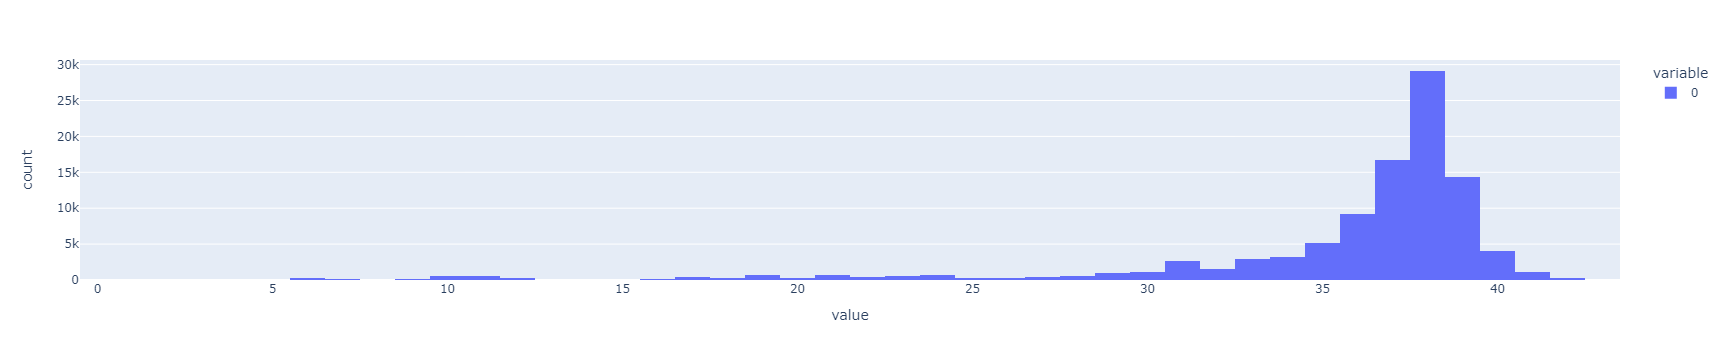

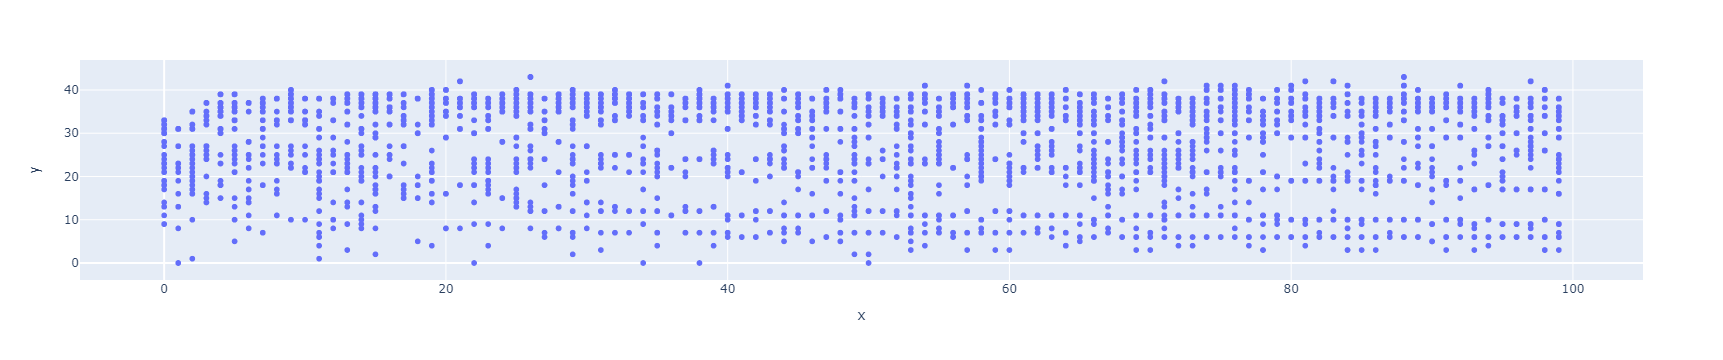

In [105]:
#get histogram of quals

indices= []
base_quals = []
for read_qual in quals: #this will look at each read 
    i= 0
    for base_qual in read_qual:
        indices.append(i)
        base_quals.append(phred33toQ(base_qual))
        i +=1
fig1 = px.histogram(base_quals, width = 500)
fig1.show()
fig2  = px.scatter(x= indices,y = base_quals, width = 500)
fig2.show()

(array([4.6000e+01, 3.8300e+02, 1.5300e+03, 6.3900e+02, 1.8270e+03,
        2.0230e+03, 3.2160e+03, 1.0225e+04, 6.0213e+04, 1.9898e+04]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

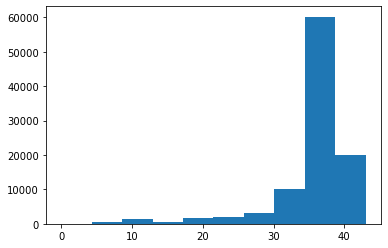

In [97]:
plt.hist(base_quals)

### Finding GC content by position

In [106]:
len(seqs)

1000

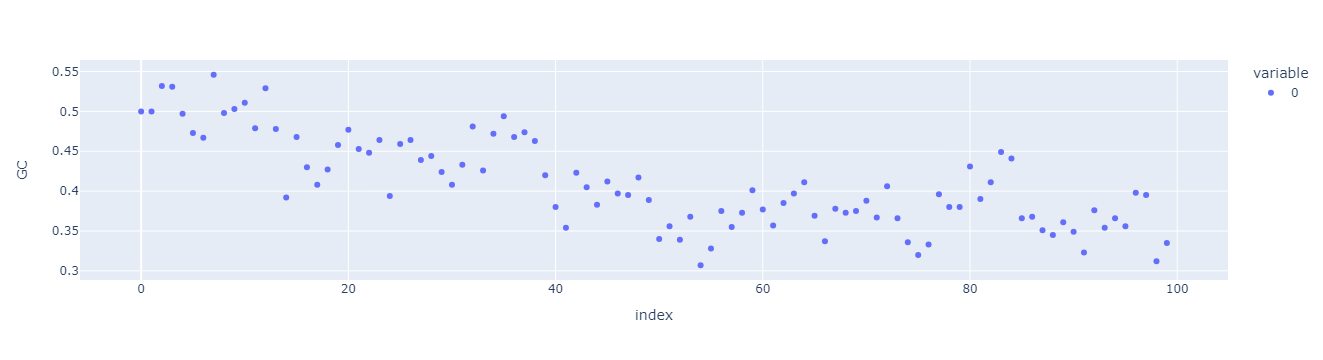

In [132]:
def findGCByPos(reads): #finds average GC content (over all reads??) for cumulative up to specified position/...who would use this 
    gc = [0] * 100 # makes a list of 100 zeroes
    totals =  [0] * 100
    for read in reads: #for each read
        for i in range(len(read)): #run though the read and increment both GC and total count
            if read[i] == 'C' or read[i] == 'G':
                gc[i] +=1 #will increment the GC count 
            totals[i] +=1 # will increment the total count
    for i in range(len(gc)):
        if totals[i] >0:
            gc[i] /= float(totals[i])
    return gc


gc = findGCByPos(seqs)
px.scatter(gc, labels ={'value':'GC'}, width = 500)

In [134]:
counts= {'A':0, 'T':0, 'G':0,'C':0}
for seq in seqs:
    counts.update(seq)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

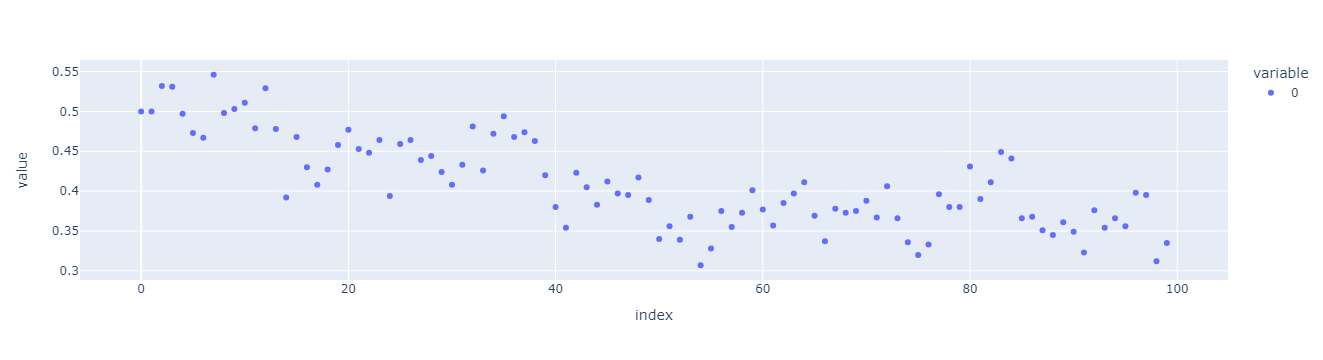